# Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_data.csv')
val = pd.read_csv('validation_data.csv')

In [23]:
X_train = train.drop(columns = ["y"])
y_train = train['y']
X_val = val.drop(columns = ["y"])
y_val = val['y']

# Question 1

In [4]:
def f(x):
    return 1/4 * x**4 - x**2 + 2*x

def f_prime(x):
    return x**3 - 2*x + 2

def f_double_prime(x):
    return 3*x**2 - 2

In [5]:
def newton(x, iter = 20):
    for k in range(iter):
        x = x - (f_prime(x) / f_double_prime(x))

    return x

In [7]:
x0 = [-1, 0, 0.1, 1, 2]

## (i)

In [8]:
for i in x0:
    print(f"For x0 = {i}, minimized value is at xk = {newton(i)}")

For x0 = -1, minimized value is at xk = -1.7692923542386314
For x0 = 0, minimized value is at xk = 0.0
For x0 = 0.1, minimized value is at xk = 0.0
For x0 = 1, minimized value is at xk = 1.0
For x0 = 2, minimized value is at xk = -1.7692923542386314


There seems to be different values for where the minimized value is reportedly calculated at depending on the initial point.

## (ii)

Depending on the initial points, Newton's algorithm may converge to a saddle point or a local minimum. In this case, since the Hessian is not positive definite, some adjustments can be made like the Levenberg-Marquadt algorithm, where the Hessian can be adjusted by adding some parameter $\mu_k$ such that the Hessian (or second derivative) is positive definite. 

Another way is for all the $x_k$ values, plug into the function f(x) and check which output produces the smallest value.

# Question 2

In [24]:
def prox(beta, val):
    return np.sign(beta) * np.maximum(np.abs(beta) - val, 0)

def gradient_descent(X, y, eta, tol, epsilon, tau, lmb, max_iter=1000, backtracking=True):
    n, p = X.shape
    beta = np.zeros(p)
    obj_values = []
    
    def obj_function(beta):
        return np.sum((X @ beta - y) ** 2) / (2 * n)
    
    def gradient(beta):
        return X.T @ (X @ beta - y) / n
    
    for _ in range(max_iter):
        grad = gradient(beta)
        
        if backtracking:
            t = eta  # Initial step size
            beta_new = beta - t * grad
            beta_new = prox(beta_new, t * lmb) #lasso selection
            
            while obj_function(beta_new) > obj_function(beta) - epsilon * t * np.sum(grad ** 2):
                t *= tau
                beta_new = beta - t * grad
                beta_new = prox(beta_new, t * lmb) #lasso selection
        else: 
            beta_new = beta - eta * grad
            beta_new = prox(beta_new, t * lmb) #lasaso selection
        
        obj_values.append(obj_function(beta_new))
        
        if np.linalg.norm(beta_new - beta) < tol:
            break
        
        beta = beta_new
    
    return beta, obj_values

def sse(X, y, beta):
        return np.sum((X @ beta - y) ** 2) / (2 * X.shape[0])

In [25]:
lambdas = np.linspace(0.005, 0.1, 10)
result = {}
beta_val = {}
for l in lambdas:
    beta, _ = gradient_descent(X_train, y_train, eta = 0.5, tol = 1e-6, epsilon = 0.01, tau = 0.8, lmb = l)
    result[l] = (sse(X_val, y_val, beta))
    beta_val[l] = beta

min(result)

0.005

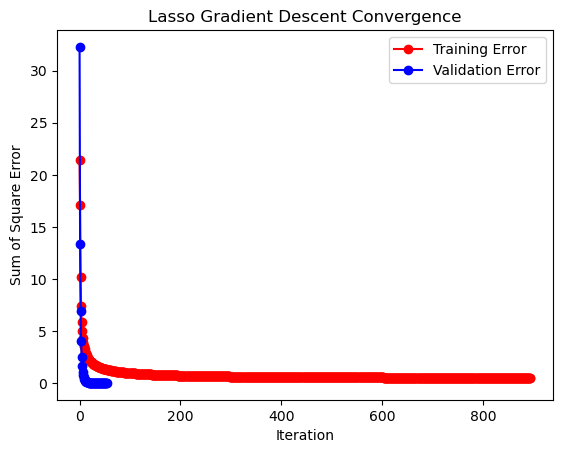

In [26]:
beta_train, obj_values_train = gradient_descent(X_train, y_train, eta = 0.5, tol = 1e-6, epsilon = 0.01, tau = 0.8, lmb = min(result))
beta_val, obj_values_val = gradient_descent(X_val, y_val, eta = 0.5, tol = 1e-6, epsilon = 0.01, tau = 0.8, lmb = min(result))

plt.plot(obj_values_train, marker='o', linestyle='-', color='red')
plt.plot(obj_values_val, marker = 'o', linestyle = '-', color = 'blue')
plt.legend(['Training Error', 'Validation Error'])
plt.xlabel("Iteration")
plt.ylabel("Sum of Square Error")
plt.title("Lasso Gradient Descent Convergence")
plt.show()

In [32]:
print(f"SSE of Training set = {sse(X_train, y_train, beta_train)}")
print(f"SSE of Validation set = {sse(X_val, y_val, beta_val)}")
print(f"Number of coefficients estimated at zero = {np.sum(beta_val == 0)}")

SSE of Training set = 0.49836073037361645
SSE of Validation set = 0.004427662747703532
Number of coefficients estimated at zero = 76
